In [1]:
import pandas as pd

from pycaret.regression import *

In [2]:
df = pd.read_csv('BikeRental.csv')

In [3]:
df

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,dayOfWeek,days
0,1,0,1,0,0,0,1,0.24,0.81,0.0000,16,Sat,0
1,1,0,1,1,0,0,1,0.22,0.80,0.0000,40,Sat,0
2,1,0,1,2,0,0,1,0.22,0.80,0.0000,32,Sat,0
3,1,0,1,3,0,0,1,0.24,0.75,0.0000,13,Sat,0
4,1,0,1,4,0,0,1,0.24,0.75,0.0000,1,Sat,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,2,0.26,0.60,0.1642,119,Mon,723
17375,1,1,12,20,0,1,2,0.26,0.60,0.1642,89,Mon,723
17376,1,1,12,21,0,1,1,0.26,0.60,0.1642,90,Mon,724
17377,1,1,12,22,0,1,1,0.26,0.56,0.1343,61,Mon,724


In [4]:
df.shape

(17379, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   hum         17379 non-null  float64
 9   windspeed   17379 non-null  float64
 10  cnt         17379 non-null  int64  
 11  dayOfWeek   17379 non-null  object 
 12  days        17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [6]:
df.describe()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,days
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,0.682721,1.425283,0.496987,0.627229,0.190098,189.463088,361.562576
std,1.106918,0.500008,3.438776,6.914405,0.167165,0.465431,0.639357,0.192556,0.192930,0.122340,181.387599,209.042828
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.480000,0.104500,40.000000,181.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.630000,0.194000,142.000000,362.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.780000,0.253700,281.000000,543.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.850700,977.000000,724.000000


### Setup the Experiment

In [7]:
exp = setup(data=df, target= 'cnt', session_id=123, train_size=0.7, normalize=True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(17379, 13)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,25.809200,1700.657500,41.159400,0.947900,0.415400,0.430100
1,CatBoost Regressor,26.471900,1755.066600,41.807800,0.946200,0.456200,0.482700
2,Random Forest,25.529400,1795.267700,42.270300,0.945000,0.347900,0.318100
3,Extra Trees Regressor,25.716700,1818.482800,42.526200,0.944300,0.342800,0.314600
4,Decision Tree,34.671500,3543.709900,59.399200,0.891400,0.452500,0.389300
5,Gradient Boosting Regressor,46.948700,4765.022100,68.969100,0.854000,0.668000,0.921100
6,Extreme Gradient Boosting,47.056700,4786.501900,69.153300,0.853200,0.668000,0.929200
7,AdaBoost Regressor,88.996200,11662.479000,107.978100,0.642000,1.100500,2.900800
8,K Neighbors Regressor,86.539900,15963.625600,126.282800,0.511100,1.043800,2.630700
9,Ridge Regression,103.779600,19285.339400,138.826200,0.409100,1.213000,3.410400


### Decision Forest Regression Model

In [9]:
rfmodel = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,26.1037,1772.1266,42.0966,0.9435,0.3173,0.2836
1,25.2536,1691.8011,41.1315,0.9493,0.3682,0.3331
2,26.2067,1817.0545,42.6269,0.9456,0.3659,0.3655
3,25.8185,1842.6494,42.9261,0.9445,0.3507,0.3263
4,23.7091,1319.2327,36.3212,0.9554,0.3485,0.3188
5,24.9848,1701.3239,41.2471,0.9470,0.3313,0.2849
6,26.6434,2256.9256,47.5071,0.9329,0.3535,0.3172
7,24.2968,1601.2618,40.0158,0.9546,0.3457,0.3117
8,26.1647,2113.8681,45.9768,0.9336,0.3585,0.3270
9,26.1126,1836.4336,42.8536,0.9440,0.3395,0.3128


In [10]:
print(rfmodel)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


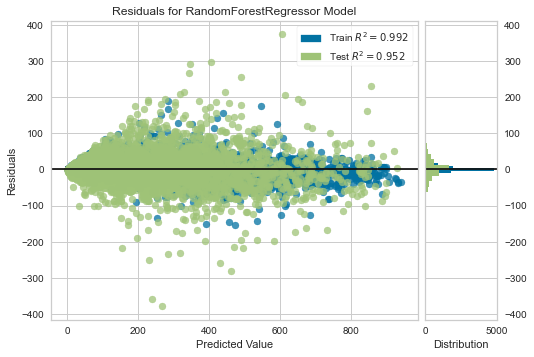

In [11]:
plot_model(rfmodel)

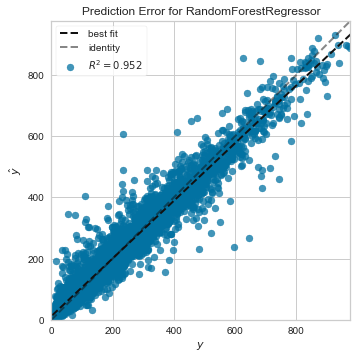

In [12]:
plot_model(rfmodel, plot = 'error')

In [13]:
evaluate_model(rfmodel)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [14]:
predict_model(rfmodel)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,24.6921,1616.729,40.2086,0.9516,0.331,0.3007


,hr,temp,hum,windspeed,days,season_1,season_2,season_3,season_4,yr_0,...,weathersit_4,dayOfWeek_Fri,dayOfWeek_Mon,dayOfWeek_Sat,dayOfWeek_Sun,dayOfWeek_Thr,dayOfWeek_Tue,dayOfWeek_Wed,cnt,Label
0,1.077962,1.054335,0.584536,-0.456099,-0.576753,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,295,299.96
1,0.354813,0.638860,-1.022312,2.228296,-0.174910,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,313,389.39
2,1.656481,-0.088222,0.740037,-0.821484,1.341570,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,84,90.16
3,-0.368336,0.015647,-0.607642,1.130506,1.265028,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,276,280.90
4,-0.657596,0.742729,1.362043,0.031899,0.719670,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,402,394.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,1.077962,-1.750123,-1.022312,1.130506,-1.691389,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41,42.70
5210,0.644072,-0.607566,-0.866811,1.862094,-1.299114,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,130,140.00
5211,1.222591,0.846597,-1.229647,0.031899,0.729237,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,314,350.01
5212,0.644072,0.015647,-1.074146,-0.699689,-1.366087,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,165,177.19
